/var/folders/zg/w5pp8km560dfjlrqkfg6yrg00000gn/T/ipykernel_701/2333359795.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(model_names))


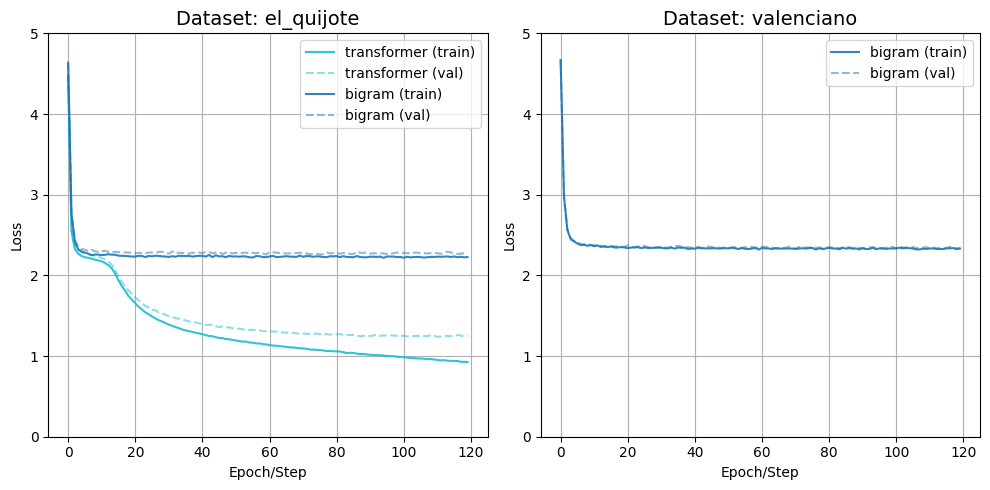

In [11]:
import os
import json
import matplotlib.pyplot as plt
from collections import defaultdict
import itertools

CHECKPOINTS_DIR = "checkpoints"
data_by_dataset = defaultdict(lambda: defaultdict(list))  # dataset -> model -> list of (train, val)

# Recolectar los datos
for filename in os.listdir(CHECKPOINTS_DIR):
    if filename.endswith('.json'):
        path = os.path.join(CHECKPOINTS_DIR, filename)
        with open(path, "r") as f:
            obj = json.load(f)
            dataset = obj["dataset"]
            model = obj["model"]
            train = obj["train"]
            val = obj["val"]
            data_by_dataset[dataset][model].append((train, val))

datasets = sorted(data_by_dataset.keys())
num_datasets = len(datasets)

# Asigna colores a cada modelo
model_names = set()
for models in data_by_dataset.values():
    model_names.update(models.keys())
model_names = sorted(model_names)
colors = plt.cm.get_cmap("tab10", len(model_names))
model2color = {model: colors(i) for i, model in enumerate(model_names)}

fig, axs = plt.subplots(1, num_datasets, figsize=(5 * num_datasets, 5), sharex=True)
if num_datasets == 1:
    axs = [axs]

for i, dataset in enumerate(datasets):
    ax = axs[i]
    ax.set_title(f"Dataset: {dataset}", fontsize=14)
    ax.set_ylabel("Loss")
    ax.set_xlabel("Epoch/Step")
    ax.set_ylim(0, 5)

    for model, runs in data_by_dataset[dataset].items():
        color = model2color[model]
        for idx, (train, val) in enumerate(runs):
            # Train: color normal, Validation: mismo color, más claro y dashed
            label_train = f"{model} (train) #{idx+1}" if len(runs) > 1 else f"{model} (train)"
            label_val = f"{model} (val) #{idx+1}" if len(runs) > 1 else f"{model} (val)"
            ax.plot(train, label=label_train, color=color, linestyle="-", alpha=0.9)
            ax.plot(val, label=label_val, color=color, linestyle="--", alpha=0.5)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()